## Problem: Design Word Search Data Structure
Design a data structure that supports adding new words and searching for existing words.

Implement the `WordDictionary` class:

- addWord(word) Adds `word` to the data structure.
- search(word) Returns `true` if there is any string in the data structure that matches`word` or `false` otherwise. `word` may contain dots `.` where dots can be matched with any letter.

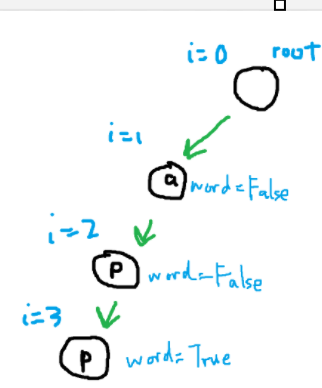

> Interestingly enough, using `dict.keys()` seem as an iterator seems to be slower than using `dict` directly as an iterator.
> This involves a function call that creates a new view object, unneccessary work

In [ ]:
class TrieNode:
    def __init__(self):
        self.children = {}  # a : TrieNode
        self.word = False


class WordDictionary:
    def __init__(self):
        self.root = TrieNode()

    def addWord(self, word: str) -> None:
        cur = self.root
        for c in word:
            if c not in cur.children:
                cur.children[c] = TrieNode()
            cur = cur.children[c]
        cur.word = True

    def search(self, word: str) -> bool:
        def dfs(node,i):
            #does i exists in this node's children?

            #note that this means we have progressed one index over the word!
            #last proper index of word is [i-1]
            #at this point, we are exactly at the last node
            if i==len(word):
                return node.word
            
            #if the last charac was '.', simply return true if any of children are true
            if word[i]=='.':
                for child in node.children:
                    #the moment i found true, then return true
                    if dfs(node.children[child],i+1):
                        return True
            
            if word[i] in node.children:
                return dfs(node.children[word[i]],i+1)
            
            return False


        return dfs(self.root,0)